# Time Series Forecasting

In [1]:
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')
sales=pd.read_csv("sales-cars.csv",index_col=0,parse_dates=[0],date_parser=parser)
sales.head()

,Date
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [3]:
sales.head()

,Date
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [3]:
sales.head(2)

,Date
Month,
2016-01-01,266
2016-02-01,146


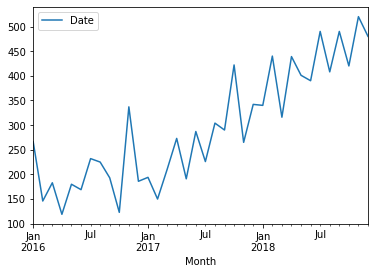

In [4]:
sales.plot()

In [5]:
# Stationarity means Mean, Variance and Covariance is constant over periods.

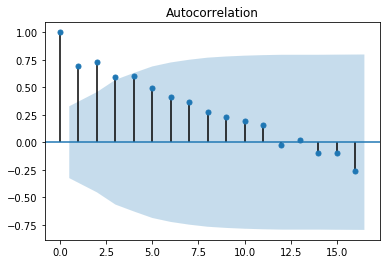

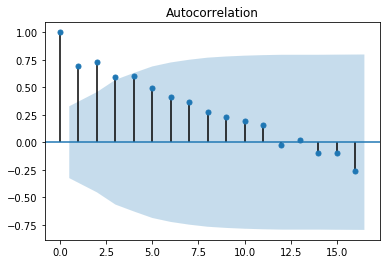

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

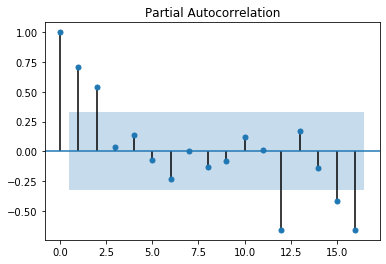

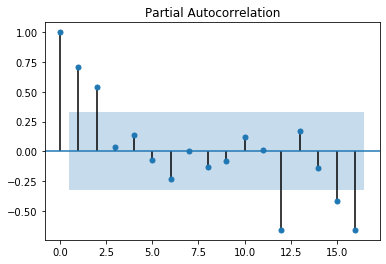

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(sales)

# Converting to Stationary

In [7]:
sales_diff=sales.diff(periods=1)

In [8]:
sales_diff=sales_diff[1:]
sales_diff.head(3)

,Date
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0


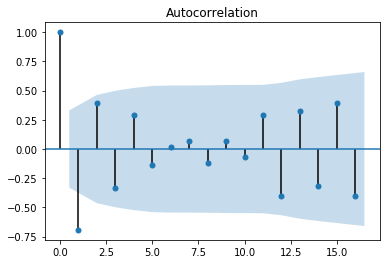

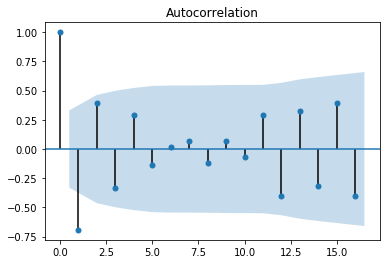

In [9]:
plot_acf(sales_diff)

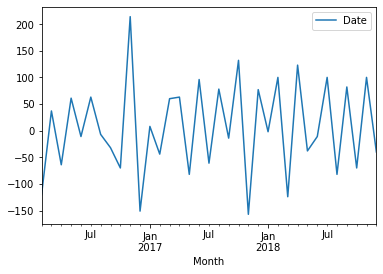

In [10]:
sales_diff.plot()

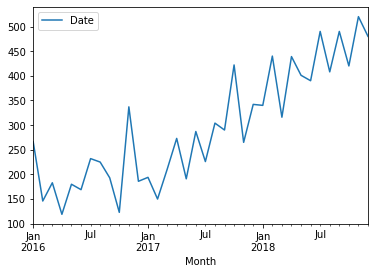

In [11]:
sales.plot()

In [12]:
sales.shape

(36, 1)

In [13]:
X=sales.values
train=X[0:27]
test=X[27:]
predictions=[]

# AutoRegressive Model (AR)

In [14]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar=AR(train)
model_ar_fit=model_ar.fit()

In [15]:
predictions=model_ar_fit.predict(start=26,end=36)

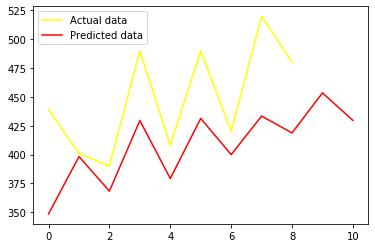

In [16]:
plt.plot(test,color='yellow',label='Actual data')
plt.plot(predictions,color='red',label="Predicted data")
plt.legend()

# ARIMA Model

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
# p,d,q ; p - periods taken for autoregressive, d - Integrated order of difference,
# q - periods in moving average

model_arima=ARIMA(train,order=(2,1,0))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic) #  Akaike Information Critera 

300.2089561239971


In [19]:
predictions = model_arima_fit.forecast(steps=9)[0]

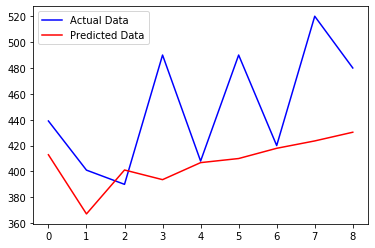

In [20]:
plt.plot(test,color='blue',label='Actual Data')
plt.plot(predictions,color='red',label='Predicted Data')
plt.legend()

In [21]:
mean_squared_error(test,predictions)

3268.51842160804

In [26]:
np.sqrt(mean_squared_error(test,predictions))

57.17095785106316

In [22]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [23]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima=ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.25060028714074
(0, 0, 3) nan
(0, 0, 4) nan
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.08415407510785
(0, 1, 2) 296.3229226907768
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469668978
(1, 0, 0) 316.16687175230527
(1, 0, 1) 313.0487174403471
(1, 0, 2) 310.97906422314304
(1, 1, 0) 298.8325442272106
(1, 1, 1) 297.125651125852
(1, 1, 2) 299.47166670626984
(1, 1, 3) 301.2851180947729
(1, 1, 4) 299.978732397043
(1, 2, 0) 306.53077675709926
(2, 0, 0) 310.9969573612434
(2, 0, 1) 339.6815476478872
(2, 1, 0) 300.2089561239971
(2, 1, 1) 297.99999301673466
(2, 1, 2) 298.55054281303126
(2, 1, 3) 302.87208155852227
(2, 2, 0) 306.2975856431761
(3, 0, 0) 312.9838587451088
(3, 0, 1) 335.3911470228986
(3, 1, 0) 294.85435842186365
(3, 1, 1) 295.99793534184477
(3, 1, 2) 292.6686238694313
(3, 1, 3) 294.6588907516466
(3, 2, 0) 299.4075868155433
(4, 0, 0) 311.07065620522735
(4, 0, 1) 321.7719846040899
(4, 1, 0) 295.9343631351464
(4, 1, 1)

# ANN (Artificial Neural Networks)

In [88]:
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neural_network import MLPClassifier

In [74]:
data=pd.read_csv("car_evaluation.csv")
data.head(1)

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc


In [78]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

In [79]:
data.shape

(1728, 7)

In [80]:
X=data.iloc[:,:-1]
y=data.outcome

In [81]:
enc=LabelEncoder()
X.buying=enc.fit_transform(X.buying)
X.maint=enc.fit_transform(X.maint)
X.lug_boot=enc.fit_transform(X.lug_boot)
X.safety=enc.fit_transform(X.safety)
X.head(1)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1


In [82]:
X=scale(X)

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)

In [103]:
model=MLPClassifier(hidden_layer_sizes=(55,67,50),random_state=10)
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(55, 67, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=10, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [104]:
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)*100

99.53703703703704

In [105]:
pd.crosstab(y_test,y_predict)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,82,1,1,0
good,0,19,0,0
unacc,0,0,307,0
vgood,0,0,0,22


In [100]:
print(confusion_matrix(y_test,y_predict))

[[ 83   1   0   0]
 [  0  18   0   1]
 [  1   0 306   0]
 [  0   0   0  22]]


In [ ]:
# Try to run this model for breast cancer dataset.